In [1]:
%matplotlib inline
%run source/admin_garmin
%run source/admin_axes
%run source/admin_header
import warnings
warnings.filterwarnings('ignore')

In [2]:
print ("Input file is (full path)  ", input_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_898238015_30.csv


In [3]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:25:51+01:00,79.400002,76,5.010,103,53.363708,-6.190183,1,False,0.000,0.0000,False
2015-09-13 07:25:52+01:00,81.680002,77,9.626,104,53.363718,-6.190250,0,False,4.616,0.0000,False
2015-09-13 07:25:53+01:00,83.960002,79,14.242,104,53.363729,-6.190317,0,False,4.616,11.0784,True
2015-09-13 07:25:54+01:00,86.240002,80,18.858,105,53.363740,-6.190384,0,False,4.616,16.6176,True
2015-09-13 07:25:55+01:00,88.520003,82,23.474,105,53.363750,-6.190451,0,False,4.616,16.6176,True


In [4]:
df_moving.head()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving,interval10
0,2015-09-13 07:25:53+01:00,83.960002,79,14.242000,104,53.363729,-6.190317,0,False,4.616000,11.078400,True,20
1,2015-09-13 07:25:54+01:00,86.240002,80,18.858000,105,53.363740,-6.190384,0,False,4.616000,16.617600,True,20
2,2015-09-13 07:25:55+01:00,88.520003,82,23.474000,105,53.363750,-6.190451,0,False,4.616000,16.617600,True,30
3,2015-09-13 07:25:56+01:00,90.800003,83,28.090000,106,53.363761,-6.190519,5,False,4.616000,16.617600,True,30
4,2015-09-13 07:25:57+01:00,90.800003,84,34.740002,106,53.363779,-6.190614,1,False,6.650002,19.058402,True,40


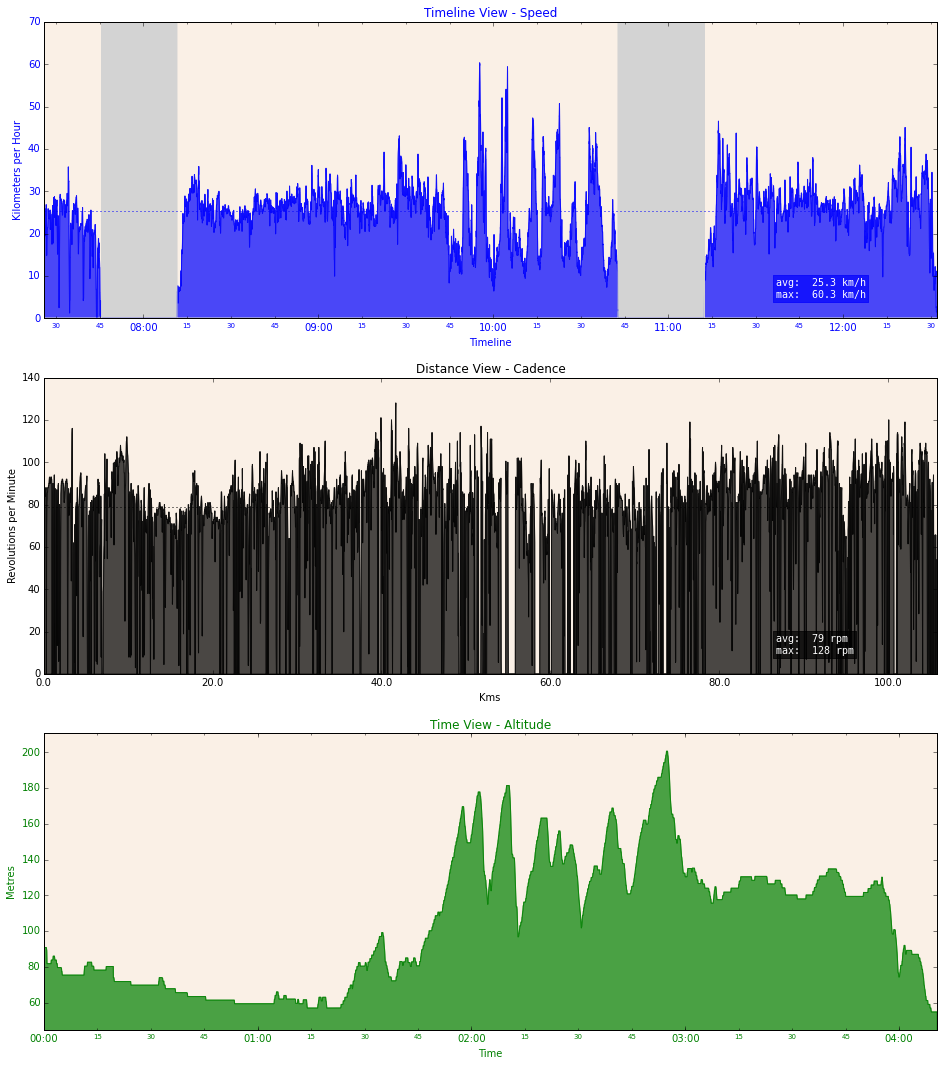

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1,  figsize=(16, 20))

#Speed over local time with breaks
#plot_control = get_plot_controls('heart_rate', activity_title = 'Timeline View - Heart Rate',)
plot_control = get_plot_controls('speed', activity_title = 'Timeline View - Speed',activity_xlabel = 'Timeline',)
_ = plot_timeline(df, plot_control, axes[0])

#Speed over distance
#plot_control = get_plot_controls('heart_rate', activity_title = 'Distance View - Heart Rate',)
plot_control = get_plot_controls('cadence', activity_title = 'Distance View - Cadence',activity_xlabel = 'Kms',)
_ = plot_distance(df_moving, plot_control, axes[1])

#Speed over activity time
#plot_control = get_plot_controls('heart_rate', activity_title = 'Time View - Heart Rate',)
plot_control = get_plot_controls('altitude', activity_title = 'Time View - Altitude',activity_xlabel = 'Time',)
_ = plot_time(df_moving, plot_control, axes[2])


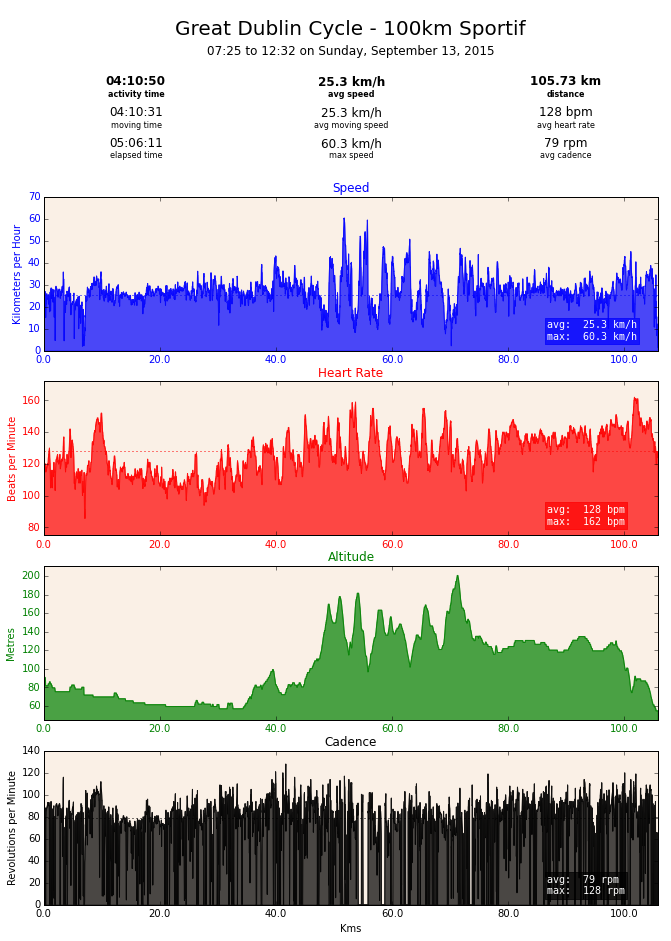

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

output_header(df, axes)

plot_control = get_plot_controls('speed',activity_xlabel = '')
_ = plot_distance(df_moving, plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
_ = plot_distance(df_moving, plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
_ = plot_distance(df_moving, plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = 'Kms')
_ = plot_distance(df_moving, plot_control, axes[4])

fig.savefig('summary_distance.png', bbox_inches='tight')

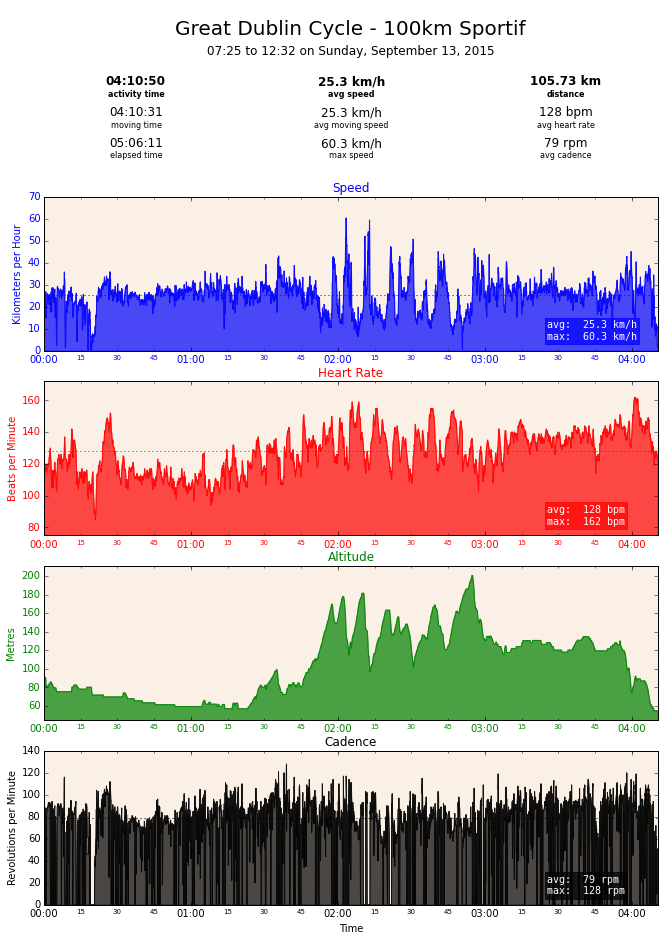

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

output_header(df, axes)

plot_control = get_plot_controls('speed',activity_xlabel = '')
_ = plot_time(df_moving, plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
_ = plot_time(df_moving, plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
_ = plot_time(df_moving, plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = 'Time')
_ = plot_time(df_moving, plot_control, axes[4])

fig.savefig('summary_activity_time.png', bbox_inches='tight')

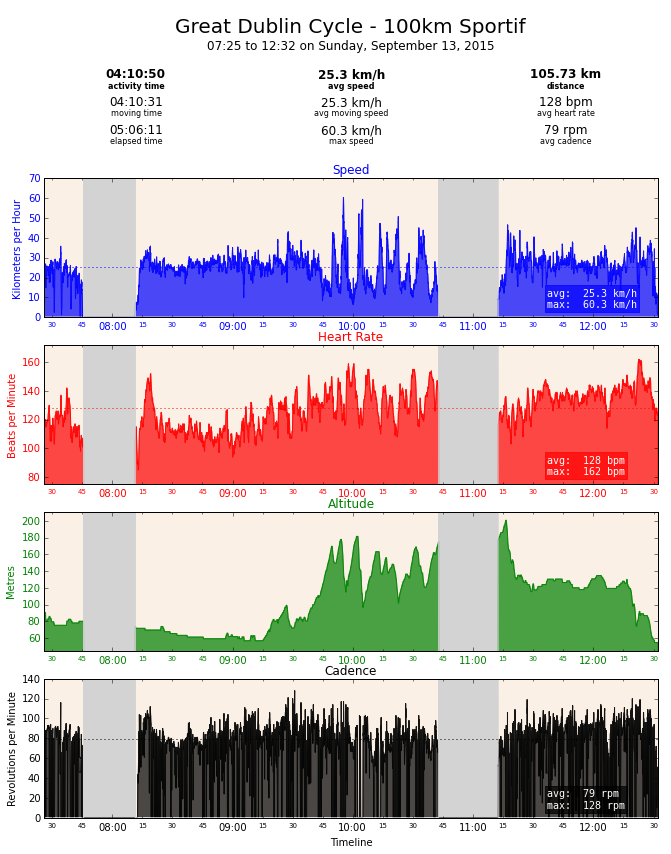

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

output_header(df, axes)

plot_control = get_plot_controls('speed',activity_xlabel = '')
_ = plot_timeline(df, plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
_ = plot_timeline(df, plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
_ = plot_timeline(df, plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = 'Timeline')
_ = plot_timeline(df, plot_control, axes[4])

fig.savefig('summary_local_time.png', bbox_inches='tight')

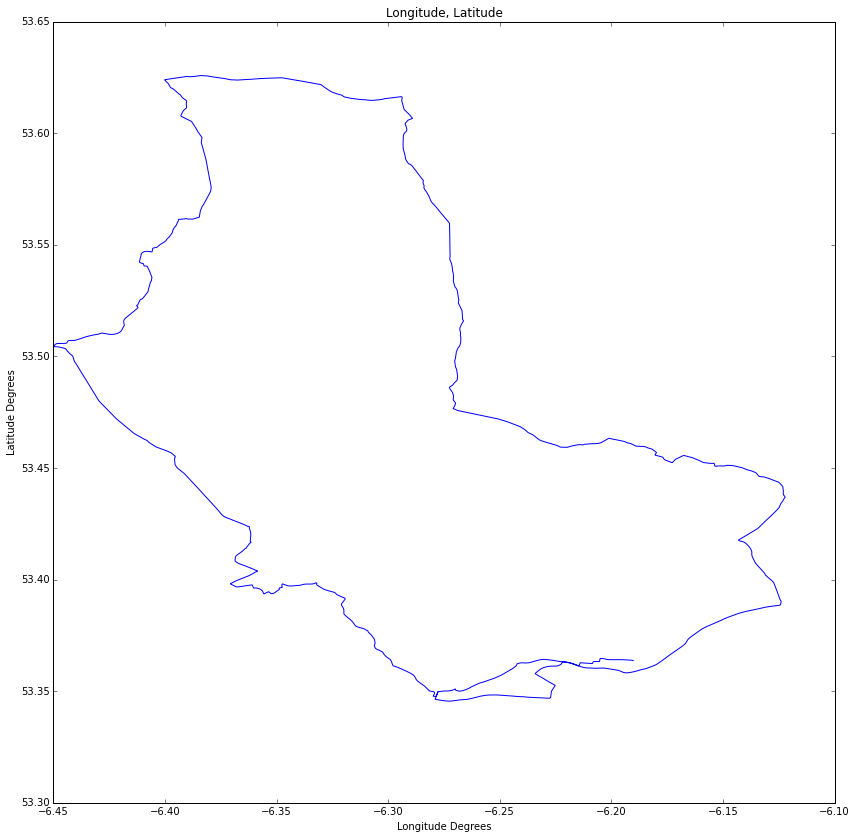

In [10]:
# new style method 2; use an axes array

fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

In [16]:
df[ ( ~df.breaks) & (~df.moving)].tail()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:45:36+01:00,80.199997,0,6910.22998,104,53.349805,-6.277627,0,False,0,0,False
2015-09-13 07:45:37+01:00,80.199997,0,6910.22998,104,53.349804,-6.277628,0,False,0,0,False
2015-09-13 07:45:38+01:00,80.199997,0,6910.22998,104,53.349804,-6.277630,0,False,0,0,False
2015-09-13 07:45:39+01:00,80.199997,0,6910.22998,104,53.349803,-6.277631,0,False,0,0,False
2015-09-13 07:45:40+01:00,80.199997,0,6910.22998,104,53.349803,-6.277632,10,False,0,0,False


In [17]:
def define_segments():
    initial_value = df.iloc[:1].breaks.values[0]
    last_value = initial_value
    start_loc = 0
    
    for loc, val in enumerate(df.breaks):
        if val != last_value:
            #print('value of iloc is ' + str(loc))
            
            yield (start_loc,loc - 1,last_value)
            last_value = val
            start_loc = loc
    yield (start_loc,loc, val)

In [18]:
seg = []
for i in define_segments():
    if ~i[2]:
        seg.append(df.iloc[i[0]:i[1]+1])
        print (str(i))

(0, 1189, False)
(2736, 11817, False)
(13593, 18371, False)


In [104]:
#df_seg = seg[0][df.moving].copy()
segment_number = 2
df_seg = seg[ segment_number ].copy()
df_seg = df_seg.reset_index()
initial_distance = df_seg.iloc[0:1].distance.values[0]
df_seg['distance'] = df_seg.distance.apply(lambda x: x - initial_distance)
df_seg['interval10'] = df_seg.distance.apply(lambda x: (int (x / 10) + 1) * 10 )

In [20]:
df_seg.iloc[0:1].distance.values[0]

0.0

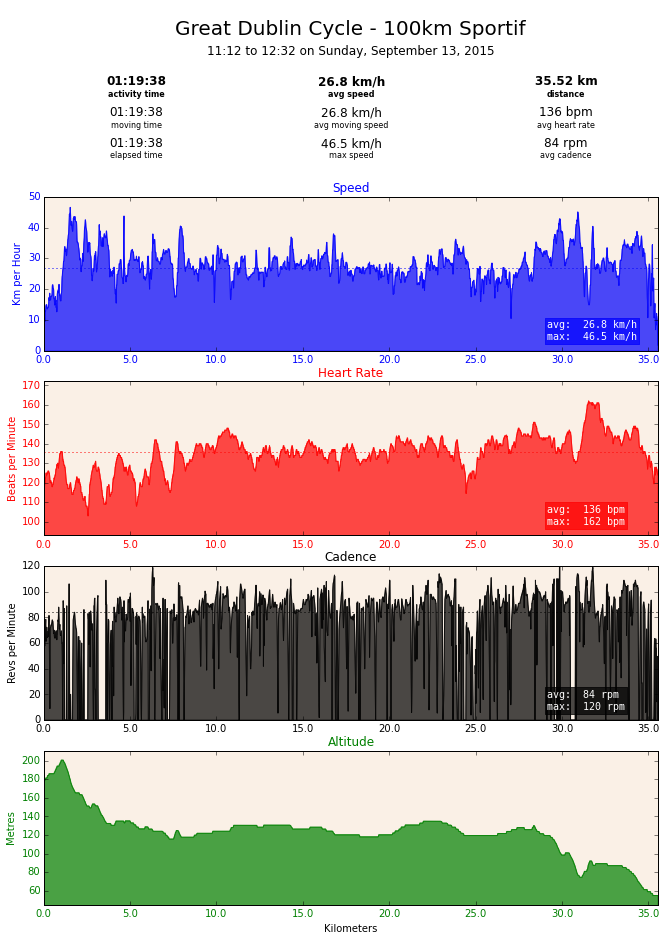

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

output_header(seg[segment_number])

#df_seg = df_seg[ ((df_seg.distance >= 26000.0)  & (df_seg.distance <= 50000.0)) ]

#Speed
plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes3(df_seg, plot_control)

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':2, 'plot_color':'red', 'show_avg': True, 'units':'bpm',
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes3(df_seg, plot_control)

#Cadence
plot_control = {'column':'cadence', 'axes_number':3, 'plot_color':'black', 'show_avg': True, 'units':'rpm',
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes3(df_seg, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':4, 'plot_color':'green', 'show_avg': False, 'units':'m',
                'plot_title':'Altitude', 'xlabel': 'Kilometers', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes3(df_seg, plot_control)

In [33]:
#df_seg.head()
#df_seg = df_seg[df_seg.distance <= 10.0]
df_seg.tail()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving,interval10
4774,2015-09-13 12:31:58+01:00,54.799999,0,35521.812500,124,53.348778,-6.277976,0,False,0.414062,1.490625,True,35530
4775,2015-09-13 12:31:59+01:00,54.799999,0,35522.226562,124,53.348780,-6.277972,0,False,0.414062,1.490625,True,35530
4776,2015-09-13 12:32:00+01:00,54.799999,0,35522.640625,124,53.348782,-6.277968,0,False,0.414062,1.490625,True,35530
4777,2015-09-13 12:32:01+01:00,54.799999,0,35523.054688,125,53.348784,-6.277964,0,False,0.414062,1.490625,True,35530
4778,2015-09-13 12:32:02+01:00,54.799999,0,35523.468750,125,53.348787,-6.277960,7,False,0.414062,1.490625,True,35530


In [23]:
len(df_seg)

3392

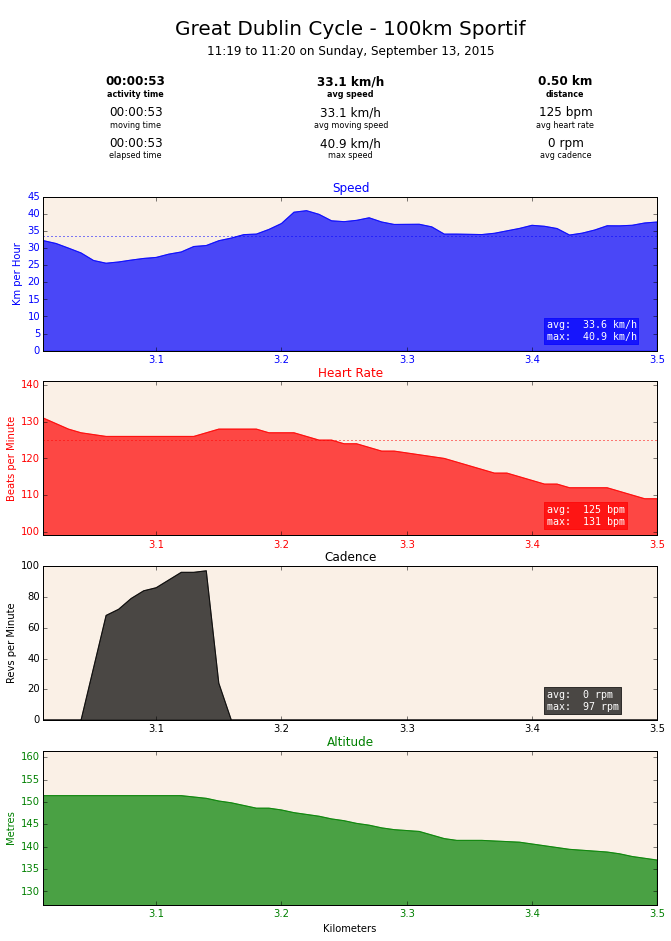

In [109]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

start_distance = 3.0 * 1000.0
end_distance = 3.5 * 1000.0

#start_distance = 0 * 1000.0
#end_distance = 32999.0 * 1000.0

#output_header(seg[segment_number])
output_header(df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))])

#Speed
plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes3(df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))], plot_control)

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':2, 'plot_color':'red', 'show_avg': True, 'units':'bpm',
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes3(df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))], plot_control)

#Cadence
plot_control = {'column':'cadence', 'axes_number':3, 'plot_color':'black', 'show_avg': True, 'units':'rpm',
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes3(df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))], plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':4, 'plot_color':'green', 'show_avg': False, 'units':'m',
                'plot_title':'Altitude', 'xlabel': 'Kilometers', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes3(df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))], plot_control)

In [86]:
df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))].tail()

len( df_seg[((df_seg.distance > start_distance) & (df_seg.distance < end_distance))] )

1189

In [96]:
def hours(x, pos):
    'The two args are the value and tick position'
    
    return '{:02d}:00'.format(int(x /3600))

def hours22(x, pos):
    'The two args are the value and tick position'
    
    return get_duration22(x)

def quarter_hours(x, pos):
    'The two args are the value and tick position'
    if x == 0:
        return ''
    elif x %  3600 == 0:
        return ''
    elif x %  1800 == 0:
        return '30'
    elif x  %  900 == 0:
        if x  %  3600  == 900:
            return '15'
        elif x  %  3600  == 2700:
            return '45'
        
def get_duration22(time_delta):
    hr = int(( time_delta )/3600) 
    minu = int ( ( ( time_delta )/3600 % 1 ) * 60) 
    sec = int ((( ( time_delta )/3600 % 1 ) * 60 % 1) * 60 ) 
    return "{:02}:{:02}:{:02}".format(hr,minu,sec)

@wrap_axes
def plot_axes2( df, plot_control ):
    
    df[ plot_control['column'] ].plot(ax=axes[ plot_control['axes_number']],
                kind='area',color= plot_control['plot_color'] ,alpha = .7); 
    
    if len(df) > 3600:
    
        majorLocator   = MultipleLocator(3600)
        minorLocator   = MultipleLocator(900)
        formatter = FuncFormatter(hours)
        minor_formatter = FuncFormatter(quarter_hours)

        axes[plot_control['axes_number']].xaxis.set_major_locator(majorLocator)
        axes[plot_control['axes_number']].xaxis.set_minor_locator(minorLocator)
        axes[plot_control['axes_number']].xaxis.set_minor_formatter(minor_formatter)
        axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)
        
    elif len(df) > 2000:
        majorLocator   = MultipleLocator(300)
        axes[plot_control['axes_number']].xaxis.set_major_locator(majorLocator)
        formatter = FuncFormatter(hours22)
        axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)        
    elif len(df) > 1000:
        majorLocator   = MultipleLocator(180)
        axes[plot_control['axes_number']].xaxis.set_major_locator(majorLocator)
        formatter = FuncFormatter(hours22)
        axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)
    elif len(df) > 0:
        majorLocator   = MultipleLocator(60)
        axes[plot_control['axes_number']].xaxis.set_major_locator(majorLocator)
        formatter = FuncFormatter(hours22)
        axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)        
    
